In [5]:
%run A_FunctionDefinitions.ipynb ;

In [9]:
returnattributeset('fdc_info')

,gauge,HUC2,Dry,PctFlow,m_90-10,err_1_abs,err_1b,break,err_2_abs,err_2b,m_1,m_2,err_ratio_abs,LAT,LONG
0,1013500,1,0,100.000000,3.102769,0.147452,0.145291,36.000000,0.037229,0.006962,4.153539,2.596842,3.960688,47.23739,-68.58264
1,1022500,1,0,100.000000,3.327158,0.089877,-0.014910,80.000000,0.067314,0.048313,3.148779,4.575811,1.335186,44.60797,-67.93524
2,1030500,1,0,100.000000,3.995663,0.090288,-0.011264,84.000000,0.070986,0.049711,3.832925,6.002756,1.271906,45.50097,-68.30596
3,1031500,1,0,100.000000,4.069357,0.126238,0.041921,23.000000,0.080756,-0.058006,5.587483,3.774795,1.563207,45.17501,-69.31470
4,1047000,1,0,100.000000,3.536871,0.161829,0.131980,28.000000,0.056010,-0.008944,5.083121,3.087960,2.889255,44.86920,-69.95510
5,1052500,1,0,100.000000,3.329761,0.181616,0.176236,30.000000,0.036816,0.004681,5.023871,2.765058,4.933031,44.87739,-71.05749
6,1054200,1,0,100.000000,3.501283,0.146647,0.130512,27.000000,0.047474,-0.020941,5.260807,3.026491,3.088986,44.39044,-70.97964
7,1055000,1,0,100.000000,3.612246,0.157352,0.145545,26.000000,0.046083,-0.008305,5.511339,3.137473,3.414551,44.64275,-70.58878
8,1057000,1,0,100.000000,4.019743,0.161186,-0.102931,81.000000,0.092400,0.044993,3.608264,7.265850,1.744434,44.30399,-70.53968
9,1073000,1,0,100.000000,4.277271,0.172425,-0.155148,71.000000,0.050473,0.020323,3.709147,6.101247,3.416167,43.14870,-70.96506


In [2]:
gauge=5393500 #8202700 
scaled=1 #1: scales to mean flow
         #0: leaves flows in ft^3/s"""

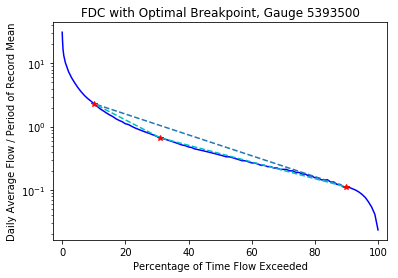

In [3]:
upslope_value=90
downslope_value=10

data=loadflow(gauge)

# FLOW DURATION CURVE
#removing partial years/nulls 
numdays=329 #minimum number of days to be accepted
data=data[data[4] != -999.0] #remove nulls
yr1=min(data[1].values)
yrEnd=max(data[1].values)
for year in range(yr1,yrEnd+1):
    if np.sum(data[1]==year)<numdays:
        data=data[data[1] != year]

flows=data[4].values

#RUN DRY? 
if np.min(flows) == 0:
    Dry=1
    PctFlow=np.sum(flows!=0)/np.size(flows)
    flows=data[data[4]!=0][4].values
else:
    Dry=0
    PctFlow=100

P=100*np.append(np.linspace(0,1,100,endpoint=False),[.995,.9975,.999,.9999])
threshold=np.percentile(flows,P)
if scaled==1: meanflow = np.mean(flows); modthresh=threshold/meanflow
if scaled==0: modthresh=threshold

fdc=pd.DataFrame({'Flow':threshold,'Scaled Flow':modthresh,'Percent Exceed':100-P})
pct=fdc['Percent Exceed'].values
flw=fdc['Scaled Flow'].values 

#ONE LINE PREDICTOR
upslope=flw[pct==upslope_value]
downslope=flw[pct==downslope_value]

m=(np.log(upslope)-np.log(downslope))/(downslope_value-upslope_value)
def slopeprediction(x):
    return np.exp(np.log(upslope)-m*(x-upslope_value))

pct_subset=pct[pct>downslope_value][pct[pct>downslope_value]<upslope_value]
predictions_oneline=slopeprediction(pct_subset)
flw_subset=flw[pct>downslope_value][pct[pct>downslope_value]<upslope_value]

#BEST BREAKPOINT DETERMINATION
breakpoint_tests=pct_subset 
N_tests=np.size(breakpoint_tests)

def slopeprediction_2(x):
    if x >= breakpoint:
        return np.exp(np.log(upslope)-m_A*(x-upslope_value))
    else:
        return np.exp(np.log(breakpoint_flw)-m_B*(x-breakpoint))

out=np.zeros(shape=(N_tests,5))
for index in range(0,N_tests):
    breakpoint=breakpoint_tests[index]
    breakpoint_flw=flw[pct==breakpoint]
    m_A=(np.log(upslope)-np.log(breakpoint_flw))/(breakpoint-upslope_value)
    m_B=(np.log(breakpoint_flw)-np.log(downslope))/(downslope_value-breakpoint)

    predictions_2=np.zeros(shape=np.shape(flw_subset))
    for i in range (0,np.size(flw_subset)):
        predictions_2[i]=slopeprediction_2(pct_subset[i])
    log_diff_2=np.log(predictions_2)-np.log(flw_subset)
    abs_log_diff_2=np.abs(log_diff_2)
    error=np.mean(abs_log_diff_2)
    error_b=np.mean(log_diff_2)

    out[index,0]=breakpoint
    out[index,1]=error
    out[index,2]=m_A
    out[index,3]=m_B
    out[index,4]=error_b
out=pd.DataFrame(out,columns=['pct','err','m_A','m_B','err_b'])
true_2line=out[out.err==np.min(out.err)]

true_breakpoint=true_2line.pct.values
meanabsdiff_2line=true_2line.err.values
m_A=true_2line.m_A.values
m_B=true_2line.m_B.values
breakpoint_flw=flw[pct==true_breakpoint]

#PREDICTED VALUES 2 LINES
def slopeprediction_2line(x):
    if x >= true_breakpoint:
        return np.exp(np.log(upslope)-m_A*(x-upslope_value))
    else:
        return np.exp(np.log(breakpoint_flw)-m_B*(x-true_breakpoint))
L=np.size(pct_subset)
predictions_2line=np.zeros(shape=(L,1))
for i in range (0,L):
    predictions_2line[i]=slopeprediction_2line(pct_subset[i])

#PLOTTING
if Dry == 1:   #rescaling the plot if the catchment runs dry
    true_breakpoint=PctFlow*true_breakpoint
    pct=PctFlow*pct
    pct_subset=PctFlow*pct_subset
    upslope_value=PctFlow*upslope_value
    downslope_value=PctFlow*downslope_value

fig=plt.figure()
plt.semilogy(pct,flw,'b-')
plt.semilogy(pct_subset,predictions_oneline,'--')
plt.semilogy(pct_subset,predictions_2line,'c--')
plt.semilogy(upslope_value,upslope,'r*',downslope_value,downslope,'r*',true_breakpoint,breakpoint_flw,'r*')
if scaled==1: plt.ylabel('Daily Average Flow / Period of Record Mean')
if scaled==0: plt.ylabel('Daily Average Flow (ft$^3$/s)')
plt.xlabel('Percentage of Time Flow Exceeded')
plt.title('FDC with Optimal Breakpoint, Gauge '+str(gauge))
axes = plt.gca()
axes.set_xlim([-3,103])
plt.show()

#ERROR VALUES
log_diff_oneline=np.log(predictions_oneline)-np.log(flw_subset)
meandiff_oneline=np.mean(log_diff_oneline)

err_1=meandiff_oneline
err_2=true_2line.err_b.values[0]
ratio=err_1/err_2

In [4]:
print('Breakpoint: '+str(true_breakpoint))
print('Percent Flow: '+str(PctFlow))
print('Error 1 Line: '+str(err_1))
print('Error 2 Line: '+str(err_2))

Breakpoint: [31.]
Percent Flow: 100
Error 1 Line: 0.252962283789161
Error 2 Line: 0.026877038994954385
